<a href="https://colab.research.google.com/github/sidnascimento/Trabalho_Pesquisa/blob/main/Estudo_vaporizacao_reatores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas basica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime
 
sns.set()
 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,9)
matplotlib.rcParams.update({'font.size':22})
 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/V_Reator/Estudo_vaporizacao_reatores_V1.xlsx', sheet_name="Planilha1")
#df = pd.read_excel('Estudo_vaporizacao_reatores_V1.xlsx')

In [ ]:
#df_VM = pd.read_excel('/content/drive/MyDrive/V_Reator/Estudo_vaporizacao_reatores_V1_VAVMOT.xlsx', sheet_name="Planilha1")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449281 entries, 0 to 449280
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DATE                   449281 non-null  datetime64[ns]
 1   U052PIC029             449281 non-null  object        
 2   U052PIC031             449281 non-null  object        
 3   U052PIC033             449281 non-null  object        
 4   U052PIC035             449281 non-null  object        
 5   U052FIC046             449281 non-null  object        
 6   U052FIC047             449281 non-null  object        
 7   U052PI063              449281 non-null  object        
 8   U052FI121              449281 non-null  object        
 9   U052FQI_RESF_REATORES  449281 non-null  object        
 10  U052FQICARGAR01A       449281 non-null  object        
 11  U052FQICARGAR01B       449281 non-null  object        
 12  U052FQICARGAR01C       449281 non-null  obje


Lista de variáveis


U052FI121 - água ácida do 52-V-08

U052FQI_RESF_REATORES - totalizador de água de resfriamento

U052FIC046 - vazão de água de resfriamento

U052FIC047 - Vazão de água de resfriamento

U052PI063 - Pressão de água de descoqueamento


U052PI097 - Pressão 52-R-01A

U052PI098 - Pressão 52-R-01B

U052PI099 - Pressão 52-R-01C

U052PI100 - Pressão 52-R-01D


U052TI430 - Temperatura saída de efluentes do 52-R-01A

U052TI431 - Temperatura saída de efluentes do 52-R-01B

U052TI432 - Temperatura saída de efluentes do 52-R-01C

U052TI433 - Temperatura saída de efluentes do 52-R-01D


U052FQICARGAR01A_C - Totalizador de carga do 52-R-01A

U052FQICARGAR01B_C - Totalizador de carga do 52-R-01B

U052FQICARGAR01C_C - Totalizador de carga do 52-R-01C

U052FQICARGAR01D_C - Totalizador de carga do 52-R-01D


U052TI1045 - Temperatura entrada de carga no 52-R-01A

U052TI1046 - Temperatura entrada de carga no 52-R-01B

U052TI1047 - Temperatura entrada de carga no 52-R-01C

U052TI1048 - Temperatura entrada de carga no 52-R-01D






In [ ]:

#df['052PIC029'] = pd.to_numeric(df['052PIC029'], errors = 'coerce')
#df['052PIC033'] = pd.to_numeric(df['052PIC033'], errors = 'coerce')
#df['052PIC031'] = pd.to_numeric(df['052PIC031'], errors = 'coerce')
#df['052PIC035'] = pd.to_numeric(df['052PIC035'], errors = 'coerce')
colums = ['U052PIC029','U052PIC031','U052PIC033','U052PIC035','U052FIC046','U052FIC047','U052PI063','U052FI121','U052FQI_RESF_REATORES','U052FQICARGAR01A','U052FQICARGAR01B','U052FQICARGAR01C','U052FQICARGAR01D','U052TI430','U052TI431','U052TI432','U052TI433','U052TI1045','U052TI1046','U052TI1047','U052TI1048']
for col in colums:
  df[col] = pd.to_numeric(df[col], errors = 'coerce')

In [ ]:
df.set_index('DATE', inplace = True)
df.sort_index(inplace= True)


In [ ]:
#df_VM.info()

In [ ]:
#colums_VM = ['U052XV046','U052XV047','U052XV048','U052XV049','U052XV016','U052XV019','U052XV031','U052XV037','U052XV026','U052XV027','U052XV034','U052XV040']
#for col in colums_VM:
#  df_VM[col] = pd.to_numeric(df_VM[col], errors = 'coerce')

In [ ]:
#df_VM.set_index('DATE', inplace = True)
#df_VM.sort_index(inplace= True)

In [ ]:
tag_ra = 'U052PIC029'#pressão do reator
tag_rb = 'U052PIC031'#pressão do reator
tag_rc = 'U052PIC033'#pressão do reator
tag_rd = 'U052PIC035'#pressão do reator
#tag_tr = 'U052TI1046'#temperatura entrada de carga
tag_p20 = 'U052PI063'
#df[tag_r][(df[tag_r]<0.1)&(df[tag_p20]>100)&(df[tag_tr]<120)].plot()
df_r1a = df[tag_ra][(df[tag_ra]<0.6)&(df[tag_rc]>0.8)&(df[tag_rd]>0.8)&(df[tag_p20]>100)]
df_r1b = df[tag_rb][(df[tag_rb]<0.6)&(df[tag_rc]>0.8)&(df[tag_rd]>0.8)&(df[tag_p20]>100)]
df_r1c = df[tag_rc][(df[tag_rc]<0.6)&(df[tag_ra]>0.8)&(df[tag_rb]>0.8)&(df[tag_p20]>100)]
df_r1d = df[tag_rd][(df[tag_rd]<0.6)&(df[tag_ra]>0.8)&(df[tag_rb]>0.8)&(df[tag_p20]>100)]

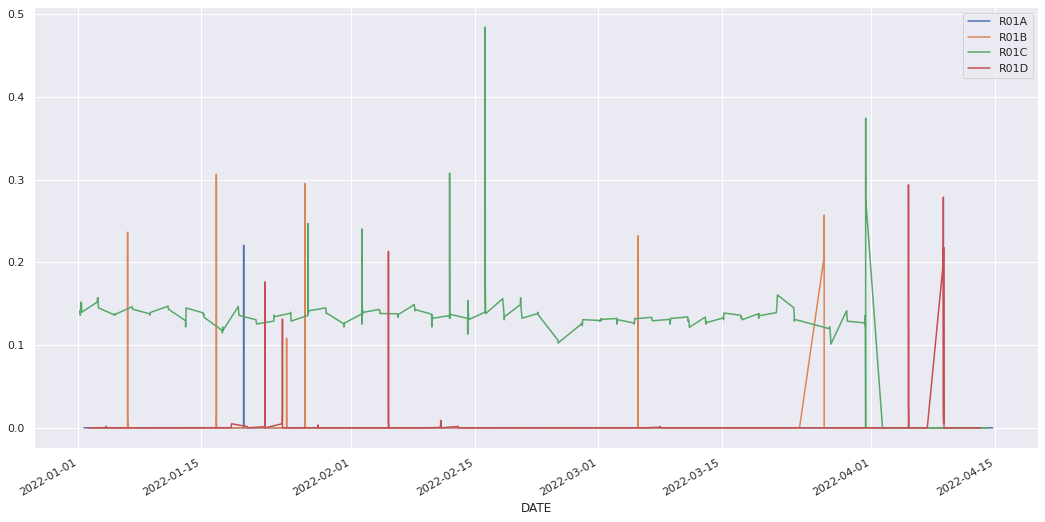

In [ ]:
df_r1a.plot()
df_r1b.plot()
df_r1c.plot()
df_r1d.plot()
plt.legend(["R01A","R01B","R01C","R01D"])

In [ ]:
initial_date = '2022-02-15 00:00:00';
final_date = '2022-02-20 23:59:59';
date_1 = datetime.datetime.strptime(initial_date, '%Y-%m-%d %H:%M:%S')
date_2 = datetime.datetime.strptime(final_date, '%Y-%m-%d %H:%M:%S')
data_avaliada = (df.index>=date_1) & (df.index<=date_2)
#df['U052FQI_RESF_REATORES'].loc[data_avaliada][(df['U052TI1045']<100)&(df['U052TI1046']>400)].plot()
#df['U052FQI_RESF_REATORES'].loc[data_avaliada].plot()
#df['U052TI1045'][(df['U052TI1045']<90)].plot()

In [ ]:
#(df['U052TI1045']<100)&&(df['U052PIC029']<0.9)
#(df['U052FQI_RESF_REATORES'].loc[data_avaliada][(df['U052TI1046']<70)]/1000).plot()
#df['U052FQI_RESF_REATORES'][(df['U052TI1046']<70)&(df_VM['U052XV019']>0)&(df_VM['U052XV027']==0)].plot()


In [ ]:
#df_VM.loc[data_avaliada]['U052XV019'].plot()
#df_VM['U052XV047'].plot()

In [ ]:
#df['U052FIC046'].loc[data_avaliada].size
df.index[[0,-1]]
#d_time = df.index[0]
#print(d_time)
#d_time += datetime.timedelta(days = 2)
#print(d_time)

DatetimeIndex(['2022-01-01', '2022-04-15'], dtype='datetime64[ns]', name='DATE', freq=None)

In [ ]:
#df_VM.columns

In [ ]:
#df_VM.loc[data_avaliada][['U052XV016','U052XV026']].plot()
#(df.loc[data_avaliada][['U052TI1045']]/500).plot()#'U052FQI_RESF_REATORES',

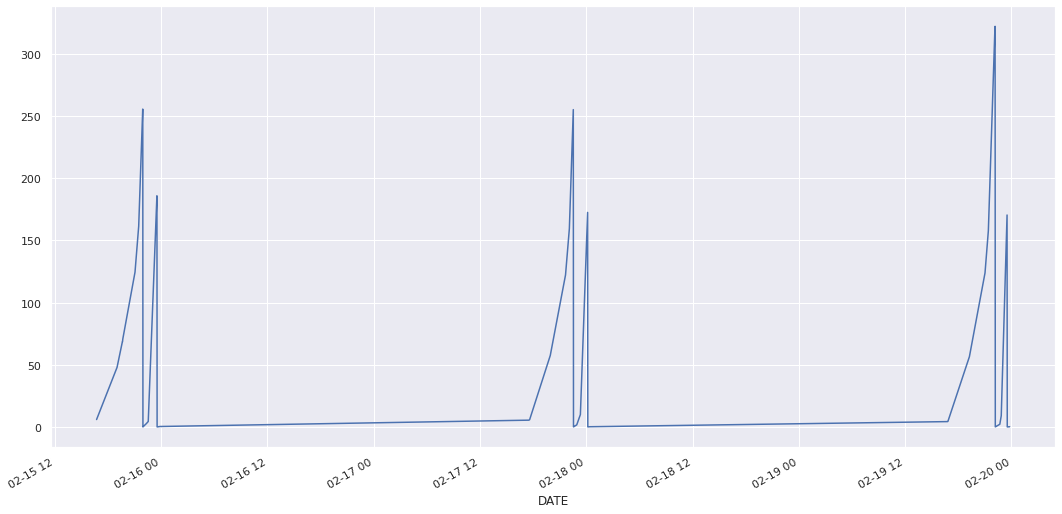

In [ ]:
flag_1resf_R1A = (df['U052TI1045']<65)#&(df_VM['U052XV046']>0.2)#&(df_VM['U052XV016']>0.2)#&(df_VM['U052XV026']<0.2)
flag_1resf_R1B = (df['U052TI1046']<65)#&(df_VM['U052XV047']>0.2)&(df_VM['U052XV019']>0.2)#&(df_VM['U052XV027']<0.2)
flag_1resf_R1C = (df['U052TI1047']<65)#&(df_VM['U052XV048']>0.2)&(df_VM['U052XV031']>0.2)#&(df_VM['U052XV034']<0.2)
flag_1resf_R1D = (df['U052TI1048']<65)#&(df_VM['U052XV049']>0.2)&(df_VM['U052XV037']>0.2)#&(df_VM['U052XV040']<0.2)
df.loc[data_avaliada]['U052FQI_RESF_REATORES'][flag_1resf_R1C].plot()#.loc[data_avaliada]

In [ ]:
d_time = df.index[0]
#df_idx1resf = pd.DataFrame(columns=['R01A','R01B','R01C','R01D'])
lst = [i for i in range(52)]
df_idx1resf = pd.DataFrame(index = lst, columns=['R01A','R01B','R01C','R01D'])
i=0
while d_time < df.index[-1]:
  date_1 = d_time
  d_time += datetime.timedelta(days = 2)
  date_2 = d_time
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  df_idx1resf.iloc[i]['R01A']=df.loc[data_avaliada]['U052FQI_RESF_REATORES'][flag_1resf_R1A].idxmax()
  df_idx1resf.iloc[i]['R01B']=df.loc[data_avaliada]['U052FQI_RESF_REATORES'][flag_1resf_R1B].idxmax()
  df_idx1resf.iloc[i]['R01C']=df.loc[data_avaliada]['U052FQI_RESF_REATORES'][flag_1resf_R1C].idxmax()
  df_idx1resf.iloc[i]['R01D']=df.loc[data_avaliada]['U052FQI_RESF_REATORES'][flag_1resf_R1D].idxmax()
  i= i+1
print(i)


52


In [ ]:
df_idx2resf = pd.DataFrame(index = lst, columns=['R01A','R01B','R01C','R01D'])

for i in lst:
  #segundo resfriamento R01A
  date_1 = df_idx1resf.iloc[i]['R01A'] + datetime.timedelta( minutes= 30)
  date_2 = df_idx1resf.iloc[i]['R01A'] + datetime.timedelta(hours= 2)
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  #df_idx2resf.iloc[i]['R01A']=df.loc[data_avaliada]['U052FQI_RESF_REATORES'][flag_1resf_R1A].idxmax()
  df_idx2resf.iloc[i]['R01A']=df.loc[data_avaliada]['U052FQI_RESF_REATORES'].idxmax()
  #segundo resfriamento R01B
  date_1 = df_idx1resf.iloc[i]['R01B'] + datetime.timedelta( minutes= 30)
  date_2 = df_idx1resf.iloc[i]['R01B'] + datetime.timedelta(hours= 2)
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  #df_idx2resf.iloc[i]['R01B']=df.loc[data_avaliada]['U052FQI_RESF_REATORES'][flag_1resf_R1B].idxmax()
  df_idx2resf.iloc[i]['R01B']=df.loc[data_avaliada]['U052FQI_RESF_REATORES'].idxmax()
  #segundo resfriamento R01C
  date_1 = df_idx1resf.iloc[i]['R01C'] + datetime.timedelta( minutes= 30)
  date_2 = df_idx1resf.iloc[i]['R01C'] + datetime.timedelta(hours= 2)
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  #df_idx2resf.iloc[i]['R01C']=df.loc[data_avaliada]['U052FQI_RESF_REATORES'][flag_1resf_R1C].idxmax()
  df_idx2resf.iloc[i]['R01C']=df.loc[data_avaliada]['U052FQI_RESF_REATORES'].idxmax()
  #segundo resfriamento R01D
  date_1 = df_idx1resf.iloc[i]['R01D'] + datetime.timedelta( minutes= 30)
  date_2 = df_idx1resf.iloc[i]['R01D'] + datetime.timedelta(hours= 2)
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  #df_idx2resf.iloc[i]['R01D']=df.loc[data_avaliada]['U052FQI_RESF_REATORES'][flag_1resf_R1D].idxmax()
  df_idx2resf.iloc[i]['R01D']=df.loc[data_avaliada]['U052FQI_RESF_REATORES'].idxmax()


In [ ]:
initial_date = '2022-02-15 00:00:00';
final_date = '2022-02-20 23:59:59';
date_1 = datetime.datetime.strptime(initial_date, '%Y-%m-%d %H:%M:%S')
date_2 = datetime.datetime.strptime(final_date, '%Y-%m-%d %H:%M:%S')
data_avaliada = (df.index>=date_1) & (df.index<=date_2)

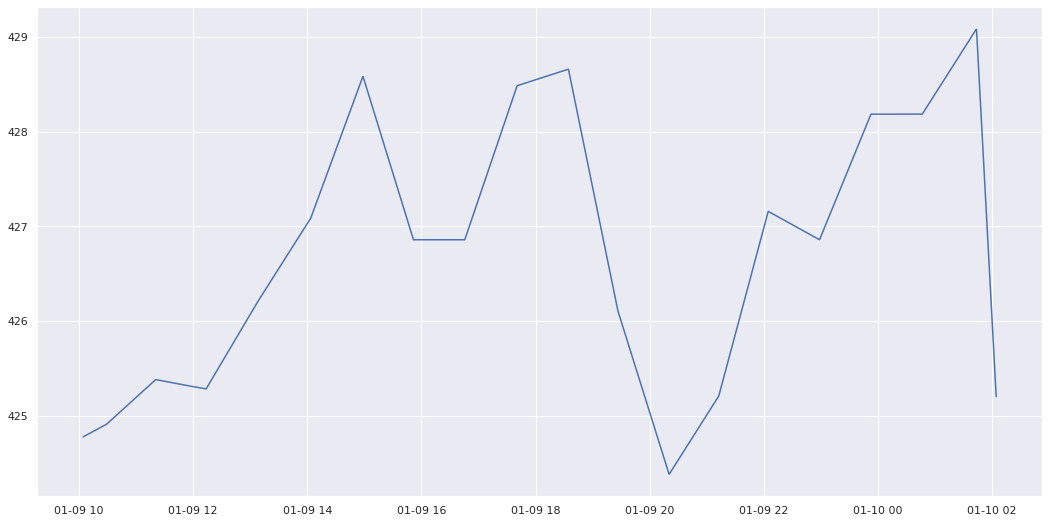

In [ ]:

#df_idx1resf.loc[(df_idx1resf['R01A']>date_1) & (df_idx1resf['R01A']< date_2)]['R01A']
#plt.plot(df.loc[df_idx1resf.loc[(df_idx1resf['R01A']>date_1) & (df_idx1resf['R01A']< date_2)]['R01A']]['U052FQI_RESF_REATORES'],'ro')
#df.loc[data_avaliada]['U052TI430'].plot()

#plt.plot(df.loc[df_idx1resf['R01A']]['U052FQI_RESF_REATORES'],'ro')
#plt.plot(df.loc[df_idx1resf['R01B']]['U052FQI_RESF_REATORES'],'go')
#plt.plot(df.loc[df_idx1resf['R01C']]['U052FQI_RESF_REATORES'],'bo')
#plt.plot(df.loc[df_idx1resf['R01D']]['U052FQI_RESF_REATORES'],'ko')
#df['U052TI430'].plot()

#plt.plot(df.loc[data_avaliada]['U052TI430'][flag_1resf_R1A],'go')#.loc[data_avaliada]
#plt.plot(df.loc[df_idx1resf.loc[(df_idx1resf['R01A']>date_1) & (df_idx1resf['R01A']< date_2)]['R01A']]['U052FQI_RESF_REATORES'],'ro')

#df.loc[data_avaliada]['U052TI430'].plot()
#df.loc[data_avaliada]['U052TI1045'].plot()

#df['U052TI430'].plot()
#plt.plot(df['U052TI1045']-df['U052TI430'])

#columns=['1Resf','2Resf','Agua_BD','P_med_resf','T_medrms_top_reat','Q_carga','T_medrms_ench','DT_reacao']
date_1 = df_idx1resf.iloc[4]['R01B'] - datetime.timedelta( days = 1)#days = 2,hours= 2;minutes= 30
date_2 = df_idx1resf.iloc[4]['R01B'] - datetime.timedelta(hours= 8)
data_avaliada = (df.index>=date_1) & (df.index<=date_2)
#plt.plot(df.loc[data_avaliada]['U052TI1046'])#
plt.plot(df.loc[data_avaliada]['U052TI431'])#

#date_1 = df_idx2resf.iloc[4]['R01B'] + datetime.timedelta( minutes= 15)#days = 2,hours= 2;minutes= 30
#date_2 = df_idx2resf.iloc[4]['R01B'] + datetime.timedelta(hours= 1)
#data_avaliada = (df.index>=date_1) & (df.index<=date_2)
#plt.plot(df.loc[data_avaliada]['U052TI1046'])#

In [ ]:
#df.apply(np.sum, axis=0)
def mean_rms (x):
  return np.sqrt(np.sum(x**2)/len(x))
#np.sqrt(((df.loc[data_avaliada]['U052TI1046']**2)/len(df.loc[data_avaliada]['U052TI1046']**2)).sum())

In [ ]:
#mean_rms(df.loc[data_avaliada]['U052TI431'])#426.82451009677567
df.loc[data_avaliada]['U052TI431'].mean()#    426.82258082147854

426.82258082147854

In [ ]:
#2022-01-01 10:11:00
teste = df_idx1resf.iloc[0]['R01A'] + datetime.timedelta(hours= -3)
teste

Timestamp('2022-01-01 07:11:00')

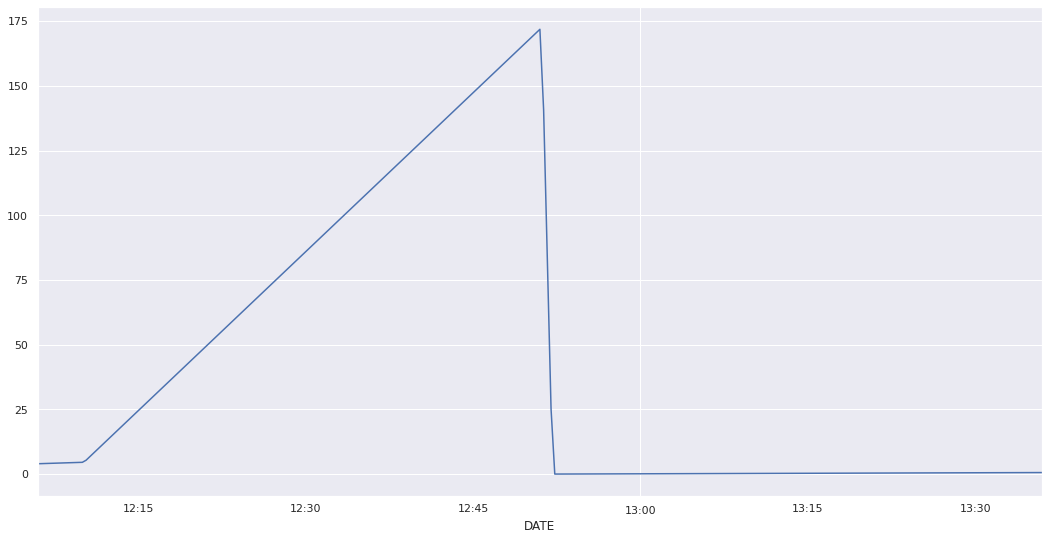

In [ ]:
date_1 = df_idx1resf.iloc[10]['R01A'] + datetime.timedelta( minutes= 30)
date_2 = df_idx1resf.iloc[10]['R01A'] + datetime.timedelta(hours= 2)
data_avaliada = (df.index>=date_1) & (df.index<=date_2)
#df.loc[data_avaliada]['U052FQI_RESF_REATORES'][flag_1resf_R1A].plot()
df.loc[data_avaliada]['U052FQI_RESF_REATORES'].plot()
#plt.plot(df.loc[data_avaliada]['U052FQI_RESF_REATORES'].max(),'go')
#df.plot.line(x=df.index,y='U052FQI_RESF_REATORES')

In [ ]:
#plt.plot(df['U052FIC046'],'go')
#df['U052FIC046']


In [ ]:
df.loc[data_avaliada]['U052FI121'].mean()*8/24

32.35115909019226

In [ ]:
Columns=['1Resf','2Resf','Agua_BD','P_med_resf','T_med_top_resfr','T_med_drenagem','Q_carga','T_med_ench','T_med_top_enc','DT_reacao']
df_R01A_parameter = pd.DataFrame(index=lst, columns=Columns)
df_R01B_parameter = pd.DataFrame(index=lst, columns=Columns)
df_R01C_parameter = pd.DataFrame(index=lst, columns=Columns)
df_R01D_parameter = pd.DataFrame(index=lst, columns=Columns)

In [ ]:
# Aquisição de dados para análise dos resfriamentos
#df_idx1resf => dataframe com os índices do primeiro resfriamento
#df_idx2resf => dataframe com os índices do segundo resfriamento
#Columns=['1Resf','2Resf','Agua_BD','P_med_resf','T_med_top_resfr','T_med_drenagem','Q_carga','T_med_ench','T_med_top_enc','DT_reacao']

#Variáveis
reator = 'R01A' #reator
T_saida = 'U052TI430' #temperatura de topo do reator
T_entrada = 'U052TI1045' #temperatura na entrada de carga no reator
P_topo = 'U052PIC029' #pressão de topo do reator
F_resfr = 'U052FQI_RESF_REATORES'#vazão de resfriamento
F_BD = 'U052FI121'#vazão de água do blow down
FQ_carga = 'U052FQICARGAR01A'#totalizador de carga
tempo_resf = 5 # tempo relativo ao primeiro resfriamento
tempo1_ench = 1 # 1 dia antes do final do primeiro resfriamento
tempo2_ench = 8 # 8 horas antes do final do primeiro resfriamento
for i in lst:
  #'1Resf': Quantidade de água no primeiro resfriamento
  df_R01A_parameter.iloc[i]['1Resf'] = df.loc[df_idx1resf.iloc[i][reator]][F_resfr]
  
  #'2Resf' Quantidade de água no segundo resfriamento
  df_R01A_parameter.iloc[i]['2Resf'] = df.loc[df_idx2resf.iloc[i][reator]][F_resfr]
  
  #'Agua_BD': Quantidade de água gerada no blow dowm durante o primeiro resfriamento
  #considerando que na média o resfriamento de 5 horas somente água
  date_1 = df_idx1resf.iloc[i][reator] - datetime.timedelta( hours= tempo_resf)
  date_2 = df_idx1resf.iloc[i][reator]
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  df_R01A_parameter.iloc[i]['Agua_BD'] = df.loc[data_avaliada][F_BD].mean()*tempo_resf/24

  #'P_med_resf': Pressão média no reator durante o resfriamento
  df_R01A_parameter.iloc[i]['P_med_resf'] = df.loc[data_avaliada][P_topo].mean()

  #'T_med_top_resfr': Temperatura média no saída do reator durante o resfriamento
  df_R01A_parameter.iloc[i]['T_med_top_resfr'] = df.loc[data_avaliada][T_saida].mean()
  
  #'T_med_drenagem': temperatura média na drenagem definitiva
  date_1 = df_idx2resf.iloc[i][reator] + datetime.timedelta( minutes= 15)
  date_2 = df_idx2resf.iloc[i][reator] + datetime.timedelta( hours= 1)
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  df_R01A_parameter.iloc[i]['T_med_drenagem'] = df.loc[data_avaliada][T_entrada].mean()

  #'Q_carga':
  df_R01A_parameter.iloc[i]['Q_carga'] = df.loc[df_idx1resf.iloc[i][reator]][FQ_carga]

  #'T_med_ench':
  date_1 = df_idx1resf.iloc[i][reator] - datetime.timedelta( days = tempo1_ench)
  date_2 = df_idx1resf.iloc[i][reator] - datetime.timedelta( hours= tempo2_ench)
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  df_R01A_parameter.iloc[i]['T_med_ench'] = df.loc[data_avaliada][T_entrada].mean()
  
  #'T_med_top_enc':
  df_R01A_parameter.iloc[i]['T_med_top_enc'] = df.loc[data_avaliada][T_saida].mean()

  #'DT_reacao':
  df_R01A_parameter.iloc[i]['DT_reacao'] = df_R01A_parameter.iloc[i]['T_med_ench']-df_R01A_parameter.iloc[i]['T_med_top_enc']



In [ ]:
#sns.pairplot(df_R01A_parameter)
#df.info()

In [ ]:
df_idx1resf.head()

,R01A,R01B,R01C,R01D
0,2022-01-01 10:11:00,2022-01-02 09:00:00,2022-01-02 21:40:00,2022-01-01 21:25:00
1,2022-01-03 08:03:00,2022-01-04 07:55:20,2022-01-04 20:41:20,2022-01-03 20:35:20
2,2022-01-05 09:00:20,2022-01-06 08:46:20,2022-01-06 21:47:20,2022-01-05 21:11:20
3,2022-01-07 08:51:20,2022-01-08 21:08:00,2022-01-08 21:40:20,2022-01-07 21:39:20
4,2022-01-09 09:42:20,2022-01-10 10:04:20,2022-01-10 22:15:20,2022-01-09 21:48:20


In [ ]:
# Aquisição de dados para análise dos resfriamentos
#df_idx1resf => dataframe com os índices do primeiro resfriamento
#df_idx2resf => dataframe com os índices do segundo resfriamento
#Columns=['1Resf','2Resf','Agua_BD','P_med_resf','T_med_top_resfr','T_med_drenagem','Q_carga','T_med_ench','T_med_top_enc','DT_reacao']

#Variáveis
reator = 'R01B' #reator
T_saida = 'U052TI431' #temperatura de topo do reator
T_entrada = 'U052TI1046' #temperatura na entrada de carga no reator
P_topo = 'U052PIC031' #pressão de topo do reator
F_resfr = 'U052FQI_RESF_REATORES'#vazão de resfriamento
F_BD = 'U052FI121'#vazão de água do blow down
FQ_carga = 'U052FQICARGAR01B'#totalizador de carga
tempo_resf = 5 # tempo relativo ao primeiro resfriamento
tempo1_ench = 1 # 1 dia antes do final do primeiro resfriamento
tempo2_ench = 8 # 8 horas antes do final do primeiro resfriamento
for i in lst:
  #'1Resf': Quantidade de água no primeiro resfriamento
  df_R01B_parameter.iloc[i]['1Resf'] = df.loc[df_idx1resf.iloc[i][reator]][F_resfr]
  #print(df.loc[df_idx1resf.iloc[i][reator]][F_resfr])
  #'2Resf' Quantidade de água no segundo resfriamento
  df_R01B_parameter.iloc[i]['2Resf'] = df.loc[df_idx2resf.iloc[i][reator]][F_resfr]
  
  #'Agua_BD': Quantidade de água gerada no blow dowm durante o primeiro resfriamento
  #considerando que na média o resfriamento de 5 horas somente água
  date_1 = df_idx1resf.iloc[i][reator] - datetime.timedelta( hours= tempo_resf)
  date_2 = df_idx1resf.iloc[i][reator]
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  df_R01B_parameter.iloc[i]['Agua_BD'] = df.loc[data_avaliada][F_BD].mean()*tempo_resf/24

  #'P_med_resf': Pressão média no reator durante o resfriamento
  df_R01B_parameter.iloc[i]['P_med_resf'] = df.loc[data_avaliada][P_topo].mean()

  #'T_med_top_resfr': Temperatura média no saída do reator durante o resfriamento
  df_R01B_parameter.iloc[i]['T_med_top_resfr'] = df.loc[data_avaliada][T_saida].mean()
  
  #'T_med_drenagem': temperatura média na drenagem definitiva
  date_1 = df_idx2resf.iloc[i][reator] + datetime.timedelta( minutes= 15)
  date_2 = df_idx2resf.iloc[i][reator] + datetime.timedelta( hours= 1)
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  df_R01B_parameter.iloc[i]['T_med_drenagem'] = df.loc[data_avaliada][T_entrada].mean()

  #'Q_carga':
  df_R01B_parameter.iloc[i]['Q_carga'] = df.loc[df_idx1resf.iloc[i][reator]][FQ_carga]

  #'T_med_ench':
  date_1 = df_idx1resf.iloc[i][reator] - datetime.timedelta( days = tempo1_ench)
  date_2 = df_idx1resf.iloc[i][reator] - datetime.timedelta( hours= tempo2_ench)
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  df_R01B_parameter.iloc[i]['T_med_ench'] = df.loc[data_avaliada][T_entrada].mean()
  
  #'T_med_top_enc':
  df_R01B_parameter.iloc[i]['T_med_top_enc'] = df.loc[data_avaliada][T_saida].mean()

  #'DT_reacao':
  df_R01B_parameter.iloc[i]['DT_reacao'] = df_R01B_parameter.iloc[i]['T_med_ench']-df_R01B_parameter.iloc[i]['T_med_top_enc']

In [ ]:
#df_R01B_parameter

In [ ]:
# Aquisição de dados para análise dos resfriamentos
#df_idx1resf => dataframe com os índices do primeiro resfriamento
#df_idx2resf => dataframe com os índices do segundo resfriamento
#Columns=['1Resf','2Resf','Agua_BD','P_med_resf','T_med_top_resfr','T_med_drenagem','Q_carga','T_med_ench','T_med_top_enc','DT_reacao']

#Variáveis
reator = 'R01C' #reator
T_saida = 'U052TI432' #temperatura de topo do reator
T_entrada = 'U052TI1047' #temperatura na entrada de carga no reator
P_topo = 'U052PIC033' #pressão de topo do reator
F_resfr = 'U052FQI_RESF_REATORES'#vazão de resfriamento
F_BD = 'U052FI121'#vazão de água do blow down
FQ_carga = 'U052FQICARGAR01C'#totalizador de carga
tempo_resf = 5 # tempo relativo ao primeiro resfriamento
tempo1_ench = 1 # 1 dia antes do final do primeiro resfriamento
tempo2_ench = 8 # 8 horas antes do final do primeiro resfriamento
for i in lst:
  #'1Resf': Quantidade de água no primeiro resfriamento
  df_R01C_parameter.iloc[i]['1Resf'] = df.loc[df_idx1resf.iloc[i][reator]][F_resfr]
  
  #'2Resf' Quantidade de água no segundo resfriamento
  df_R01C_parameter.iloc[i]['2Resf'] = df.loc[df_idx2resf.iloc[i][reator]][F_resfr]
  
  #'Agua_BD': Quantidade de água gerada no blow dowm durante o primeiro resfriamento
  #considerando que na média o resfriamento de 5 horas somente água
  date_1 = df_idx1resf.iloc[i][reator] - datetime.timedelta( hours= tempo_resf)
  date_2 = df_idx1resf.iloc[i][reator]
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  df_R01C_parameter.iloc[i]['Agua_BD'] = df.loc[data_avaliada][F_BD].mean()*tempo_resf/24

  #'P_med_resf': Pressão média no reator durante o resfriamento
  df_R01C_parameter.iloc[i]['P_med_resf'] = df.loc[data_avaliada][P_topo].mean()

  #'T_med_top_resfr': Temperatura média no saída do reator durante o resfriamento
  df_R01C_parameter.iloc[i]['T_med_top_resfr'] = df.loc[data_avaliada][T_saida].mean()
  
  #'T_med_drenagem': temperatura média na drenagem definitiva
  date_1 = df_idx2resf.iloc[i][reator] + datetime.timedelta( minutes= 15)
  date_2 = df_idx2resf.iloc[i][reator] + datetime.timedelta( hours= 1)
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  df_R01C_parameter.iloc[i]['T_med_drenagem'] = df.loc[data_avaliada][T_entrada].mean()

  #'Q_carga':
  df_R01C_parameter.iloc[i]['Q_carga'] = df.loc[df_idx1resf.iloc[i][reator]][FQ_carga]

  #'T_med_ench':
  date_1 = df_idx1resf.iloc[i][reator] - datetime.timedelta( days = tempo1_ench)
  date_2 = df_idx1resf.iloc[i][reator] - datetime.timedelta( hours= tempo2_ench)
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  df_R01C_parameter.iloc[i]['T_med_ench'] = df.loc[data_avaliada][T_entrada].mean()
  
  #'T_med_top_enc':
  df_R01C_parameter.iloc[i]['T_med_top_enc'] = df.loc[data_avaliada][T_saida].mean()

  #'DT_reacao':
  df_R01C_parameter.iloc[i]['DT_reacao'] = df_R01C_parameter.iloc[i]['T_med_ench']-df_R01C_parameter.iloc[i]['T_med_top_enc']

In [ ]:
# Aquisição de dados para análise dos resfriamentos
#df_idx1resf => dataframe com os índices do primeiro resfriamento
#df_idx2resf => dataframe com os índices do segundo resfriamento
#Columns=['1Resf','2Resf','Agua_BD','P_med_resf','T_med_top_resfr','T_med_drenagem','Q_carga','T_med_ench','T_med_top_enc','DT_reacao']

#Variáveis
reator = 'R01D' #reator
T_saida = 'U052TI433' #temperatura de topo do reator
T_entrada = 'U052TI1048' #temperatura na entrada de carga no reator
P_topo = 'U052PIC035' #pressão de topo do reator
F_resfr = 'U052FQI_RESF_REATORES'#vazão de resfriamento
F_BD = 'U052FI121'#vazão de água do blow down
FQ_carga = 'U052FQICARGAR01D'#totalizador de carga
tempo_resf = 5 # tempo relativo ao primeiro resfriamento
tempo1_ench = 1 # 1 dia antes do final do primeiro resfriamento
tempo2_ench = 8 # 8 horas antes do final do primeiro resfriamento
for i in lst:
  #'1Resf': Quantidade de água no primeiro resfriamento
  df_R01D_parameter.iloc[i]['1Resf'] = df.loc[df_idx1resf.iloc[i][reator]][F_resfr]
  
  #'2Resf' Quantidade de água no segundo resfriamento
  df_R01D_parameter.iloc[i]['2Resf'] = df.loc[df_idx2resf.iloc[i][reator]][F_resfr]
  
  #'Agua_BD': Quantidade de água gerada no blow dowm durante o primeiro resfriamento
  #considerando que na média o resfriamento de 5 horas somente água
  date_1 = df_idx1resf.iloc[i][reator] - datetime.timedelta( hours= tempo_resf)
  date_2 = df_idx1resf.iloc[i][reator]
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  df_R01D_parameter.iloc[i]['Agua_BD'] = df.loc[data_avaliada][F_BD].mean()*tempo_resf/24

  #'P_med_resf': Pressão média no reator durante o resfriamento
  df_R01D_parameter.iloc[i]['P_med_resf'] = df.loc[data_avaliada][P_topo].mean()

  #'T_med_top_resfr': Temperatura média no saída do reator durante o resfriamento
  df_R01D_parameter.iloc[i]['T_med_top_resfr'] = df.loc[data_avaliada][T_saida].mean()
  
  #'T_med_drenagem': temperatura média na drenagem definitiva
  date_1 = df_idx2resf.iloc[i][reator] + datetime.timedelta( minutes= 15)
  date_2 = df_idx2resf.iloc[i][reator] + datetime.timedelta( hours= 1)
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  df_R01D_parameter.iloc[i]['T_med_drenagem'] = df.loc[data_avaliada][T_entrada].mean()

  #'Q_carga':
  df_R01D_parameter.iloc[i]['Q_carga'] = df.loc[df_idx1resf.iloc[i][reator]][FQ_carga]

  #'T_med_ench':
  date_1 = df_idx1resf.iloc[i][reator] - datetime.timedelta( days = tempo1_ench)
  date_2 = df_idx1resf.iloc[i][reator] - datetime.timedelta( hours= tempo2_ench)
  data_avaliada = (df.index>=date_1) & (df.index<=date_2)
  df_R01D_parameter.iloc[i]['T_med_ench'] = df.loc[data_avaliada][T_entrada].mean()
  
  #'T_med_top_enc':
  df_R01D_parameter.iloc[i]['T_med_top_enc'] = df.loc[data_avaliada][T_saida].mean()

  #'DT_reacao':
  df_R01D_parameter.iloc[i]['DT_reacao'] = df_R01D_parameter.iloc[i]['T_med_ench']-df_R01D_parameter.iloc[i]['T_med_top_enc']

In [ ]:
#df_R01D_parameter

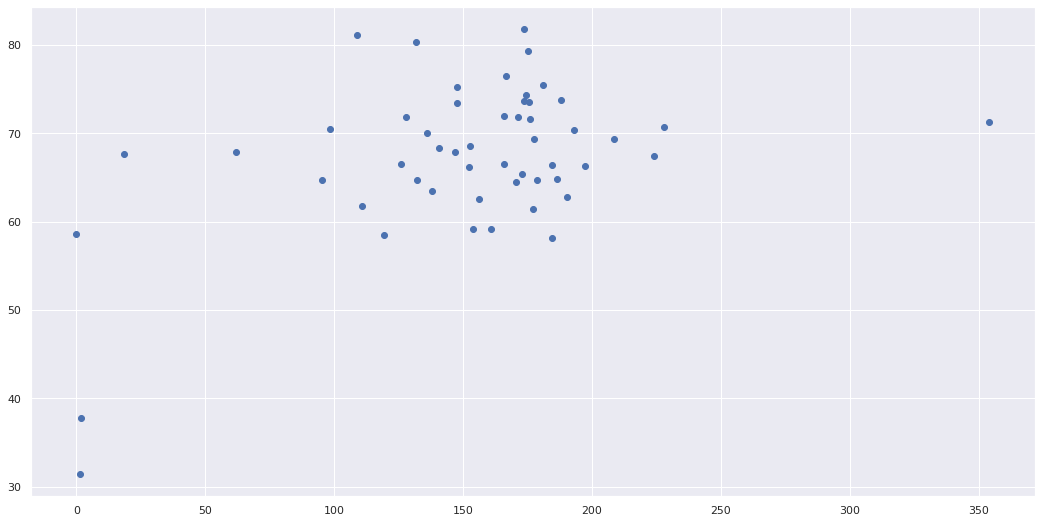

In [ ]:
plt.scatter(df_R01D_parameter['2Resf'],df_R01D_parameter['Agua_BD'])
#plt.scatter(df_R01D_parameter['1Resf'], df_R01D_parameter['2Resf'])

In [ ]:
#df_r1b.index

In [ ]:
df.index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 00:00:20',
               '2022-01-01 00:00:40', '2022-01-01 00:01:00',
               '2022-01-01 00:01:20', '2022-01-01 00:01:40',
               '2022-01-01 00:02:00', '2022-01-01 00:02:20',
               '2022-01-01 00:02:40', '2022-01-01 00:03:00',
               ...
               '2022-04-14 23:57:00', '2022-04-14 23:57:20',
               '2022-04-14 23:57:40', '2022-04-14 23:58:00',
               '2022-04-14 23:58:20', '2022-04-14 23:58:40',
               '2022-04-14 23:59:00', '2022-04-14 23:59:20',
               '2022-04-14 23:59:40', '2022-04-15 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=449281, freq=None)

In [ ]:
df_descoq = pd.DataFrame(data=0, index= df.index, columns= ['R01A','R01B','R01C','R01D'])

In [ ]:
df_descoq['R01A'] = df_r1a.copy()
df_descoq['R01B'] = df_r1b.copy()
df_descoq['R01C'] = df_r1c.copy()
df_descoq['R01D'] = df_r1d.copy()

In [ ]:
df_descoq.fillna(0,inplace= True)

#df_descoq['R01C'].plot()

In [ ]:
df_R01A_parameter['V_desc'] = 0
df_R01B_parameter['V_desc'] = 0
df_R01C_parameter['V_desc'] = 0
df_R01D_parameter['V_desc'] = 0

In [ ]:
d_time = df_descoq.index[0]
i=0
while d_time < df_descoq.index[-1]:
  date_1 = d_time
  d_time += datetime.timedelta(days = 2)
  date_2 = d_time
  data_avaliada = (df_descoq.index>=date_1) & (df_descoq.index<=date_2)
  
  aux = df_descoq.loc[data_avaliada]['R01A'].max()
  if aux>0.0001:
    print([aux,i])
    #print( df_descoq.loc[data_avaliada]['R01D'].max()+i)
    df_R01A_parameter.at[i,'V_desc'] = 1
    #df_R01B_parameter.iloc[i]['V_desc'] = 1
#  else:
#    df_R01B_parameter.at[i,'V_desc'] = aux.copy()
#    #df_R01B_parameter.iloc[i]['V_desc'] = 3
#    print([aux,i])
    
  i=i+1




[0.2206534892320633, 9]


In [ ]:
d_time = df_descoq.index[0]
i=0
while d_time < df_descoq.index[-1]:
  date_1 = d_time
  d_time += datetime.timedelta(days = 2)
  date_2 = d_time
  data_avaliada = (df_descoq.index>=date_1) & (df_descoq.index<=date_2)
  
  aux = df_descoq.loc[data_avaliada]['R01B'].max()
  if aux>0.0001:
    print([aux,i])
    #print( df_descoq.loc[data_avaliada]['R01D'].max()+i)
    df_R01B_parameter.at[i,'V_desc'] = 1
    #df_R01B_parameter.iloc[i]['V_desc'] = 1
#  else:
#    df_R01B_parameter.at[i,'V_desc'] = aux.copy()
#    #df_R01B_parameter.iloc[i]['V_desc'] = 3
#    print([aux,i])
    
  i=i+1
print(i)


[0.23632559180259705, 2]
[0.306350976228714, 7]
[0.10828689485788345, 11]
[0.2953065037727356, 12]
[0.23202627897262573, 31]
[0.25697335600852966, 42]
52


In [ ]:
d_time = df_descoq.index[0]
i=0
while d_time < df_descoq.index[-1]:
  date_1 = d_time
  d_time += datetime.timedelta(days = 2)
  date_2 = d_time
  data_avaliada = (df_descoq.index>=date_1) & (df_descoq.index<=date_2)
  
  aux = df_descoq.loc[data_avaliada]['R01C'].max()
  if aux>0.21:
    print([aux,i])
    #print( df_descoq.loc[data_avaliada]['R01D'].max()+i)
    df_R01C_parameter.at[i,'V_desc'] = 1
    #df_R01B_parameter.iloc[i]['V_desc'] = 1
#  else:
#    df_R01B_parameter.at[i,'V_desc'] = aux.copy()
#    #df_R01B_parameter.iloc[i]['V_desc'] = 3
#    print([aux,i])
    
  i=i+1

[0.24701322615146637, 13]
[0.24036471545696259, 16]
[0.3078726530075073, 21]
[0.48413828015327454, 23]
[0.37431803345680237, 44]


In [ ]:
d_time = df_descoq.index[0]
i=0
while d_time < df_descoq.index[-1]:
  date_1 = d_time
  d_time += datetime.timedelta(days = 2)
  date_2 = d_time
  data_avaliada = (df_descoq.index>=date_1) & (df_descoq.index<=date_2)
  
  aux = df_descoq.loc[data_avaliada]['R01D'].max()
  if aux>0.0001:
    print([aux,i])
    #print( df_descoq.loc[data_avaliada]['R01D'].max()+i)
    df_R01D_parameter.at[i,'V_desc'] = 1
    #df_R01B_parameter.iloc[i]['V_desc'] = 1
#  else:
#    df_R01B_parameter.at[i,'V_desc'] = aux.copy()
#    #df_R01B_parameter.iloc[i]['V_desc'] = 3
#    print([aux,i])
    
  i=i+1

[0.0017545268638059497, 1]
[0.004906252026557922, 8]
[0.0017547875177115202, 9]
[0.1763516217470169, 10]
[0.13133206963539124, 11]
[0.0035042702220380306, 13]
[0.213257297873497, 17]
[0.009078792296350002, 20]
[0.0017505207797512412, 21]
[0.0017538908869028091, 33]
[0.2935968339443207, 47]
[0.2786979377269745, 49]


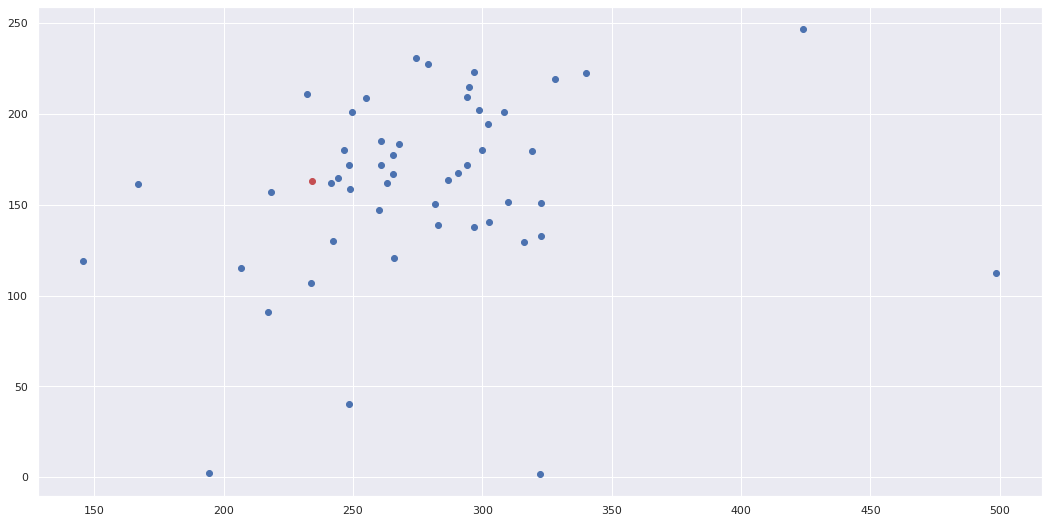

In [ ]:
plt.scatter(df_R01A_parameter['1Resf'][(df_R01A_parameter['V_desc']==1)],df_R01A_parameter['2Resf'][(df_R01A_parameter['V_desc']==1)],c="r")
plt.scatter(df_R01A_parameter['1Resf'][(df_R01A_parameter['V_desc']==0)],df_R01A_parameter['2Resf'][(df_R01A_parameter['V_desc']==0)])

In [ ]:
#plt.scatter(df_R01B_parameter['1Resf'][(df_R01B_parameter['V_desc']==1)],df_R01B_parameter['2Resf'][(df_R01B_parameter['V_desc']==1)],c="r")
#plt.scatter(df_R01B_parameter['1Resf'][(df_R01B_parameter['V_desc']==0)],df_R01B_parameter['2Resf'][(df_R01B_parameter['V_desc']==0)])
#df_R01B_parameter

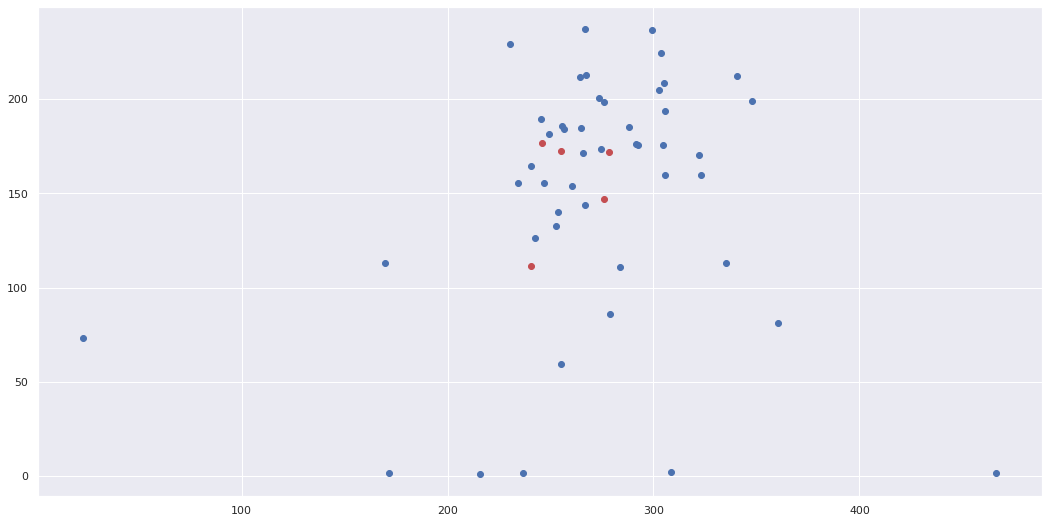

In [ ]:
plt.scatter(df_R01C_parameter['1Resf'][(df_R01C_parameter['V_desc']==1)],df_R01C_parameter['2Resf'][(df_R01C_parameter['V_desc']==1)],c="r")
plt.scatter(df_R01C_parameter['1Resf'][(df_R01C_parameter['V_desc']==0)],df_R01C_parameter['2Resf'][(df_R01C_parameter['V_desc']==0)])

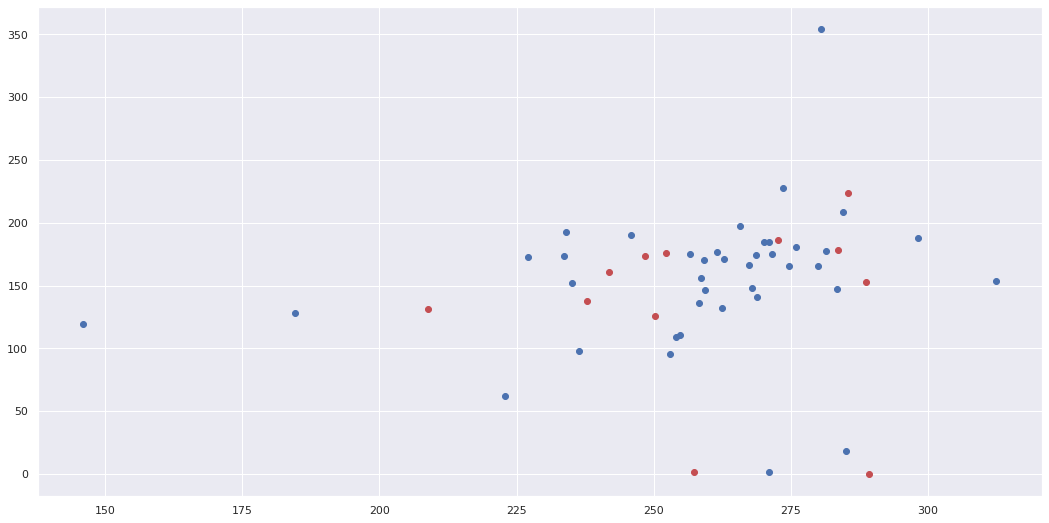

In [ ]:
plt.scatter(df_R01D_parameter['1Resf'][(df_R01D_parameter['V_desc']==1)],df_R01D_parameter['2Resf'][(df_R01D_parameter['V_desc']==1)],c="r")
plt.scatter(df_R01D_parameter['1Resf'][(df_R01D_parameter['V_desc']==0)],df_R01D_parameter['2Resf'][(df_R01D_parameter['V_desc']==0)])

In [ ]:
#df_R01A_parameter['P_2resf'] = 0
#df_R01B_parameter['P_2resf'] = 0
#df_R01C_parameter['P_2resf'] = 0
#df_R01D_parameter['P_2resf'] = 0

In [ ]:
#df_R01A_parameter['P_2resf'] = df.loc[df_idx2resf['R01A']]['U052PIC029'].tolist()
#df_R01B_parameter['P_2resf'] = df.loc[df_idx2resf['R01B']]['U052PIC031'].tolist()
#df_R01C_parameter['P_2resf'] = df.loc[df_idx2resf['R01C']]['U052PIC033'].tolist()
#df_R01D_parameter['P_2resf'] = df.loc[df_idx2resf['R01D']]['U052PIC035'].tolist()

In [ ]:
#df_R01A_parameter['Carga'] = 0
#df_R01B_parameter['Carga'] = 0
#df_R01C_parameter['Carga'] = 0
#df_R01D_parameter['Carga'] = 0

#df_R01A_parameter['Carga'] = df.loc[df_idx2resf['R01A']]['U052FQICARGAR01A'].tolist()
#df_R01B_parameter['Carga'] = df.loc[df_idx2resf['R01B']]['U052FQICARGAR01B'].tolist()
#df_R01C_parameter['Carga'] = df.loc[df_idx2resf['R01C']]['U052FQICARGAR01C'].tolist()
#df_R01D_parameter['Carga'] = df.loc[df_idx2resf['R01D']]['U052FQICARGAR01D'].tolist()

In [ ]:
#[1Resf,2Resf,Agua_BD,V_desc,P_2resf,Carga]
#plt.scatter(df_R01D_parameter['P_2resf'][(df_R01D_parameter['V_desc']==1)],df_R01D_parameter['Agua_BD'][(df_R01D_parameter['V_desc']==1)],c="r")
#plt.scatter(df_R01D_parameter['P_2resf'][(df_R01D_parameter['V_desc']==0)],df_R01D_parameter['Agua_BD'][(df_R01D_parameter['V_desc']==0)])

In [ ]:
#[0.0017545268638059497, 1]
#[0.004906252026557922, 8]
#[0.0017547875177115202, 9]
#[0.1763516217470169, 10]
#[0.13133206963539124, 11]
#[0.0035042702220380306, 13]
#[0.213257297873497, 17]
#[0.009078792296350002, 20]
#[0.0017505207797512412, 21]
#[0.0017538908869028091, 33]
#[0.2935968339443207, 47]
#[0.2786979377269745, 49]
#t = 11
#date_1 = df_idx1resf.iloc[t]['R01D'] + datetime.timedelta(hours= 0)
#date_2 = df_idx1resf.iloc[t]['R01D'] + datetime.timedelta(minutes= 160)
#data_avaliada = (df.index>=date_1) & (df.index<=date_2)
#df.loc[data_avaliada]['U052TI433'].plot()

In [ ]:
df_reator_parameter = pd.concat([df_R01A_parameter,df_R01B_parameter,df_R01C_parameter,df_R01D_parameter], axis= 0)
df_reator_parameter.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            42, 43, 44, 45, 46, 47, 48, 49, 50, 51],
           dtype='int64', length=208)

In [ ]:
#plt.scatter(df_reator_parameter['2Resf'][(df_reator_parameter['V_desc']==1)],df_reator_parameter['Carga'][(df_reator_parameter['V_desc']==1)],c="r")
#plt.scatter(df_reator_parameter['2Resf'][(df_reator_parameter['V_desc']==0)],df_reator_parameter['Carga'][(df_reator_parameter['V_desc']==0)])

In [ ]:
#sns.pairplot(df_reator_parameter, hue='V_desc')
df_reator_parameter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 51
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   1Resf            208 non-null    object
 1   2Resf            208 non-null    object
 2   Agua_BD          208 non-null    object
 3   P_med_resf       208 non-null    object
 4   T_med_top_resfr  208 non-null    object
 5   T_med_drenagem   208 non-null    object
 6   Q_carga          208 non-null    object
 7   T_med_ench       208 non-null    object
 8   T_med_top_enc    208 non-null    object
 9   DT_reacao        208 non-null    object
 10  V_desc           208 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 19.5+ KB


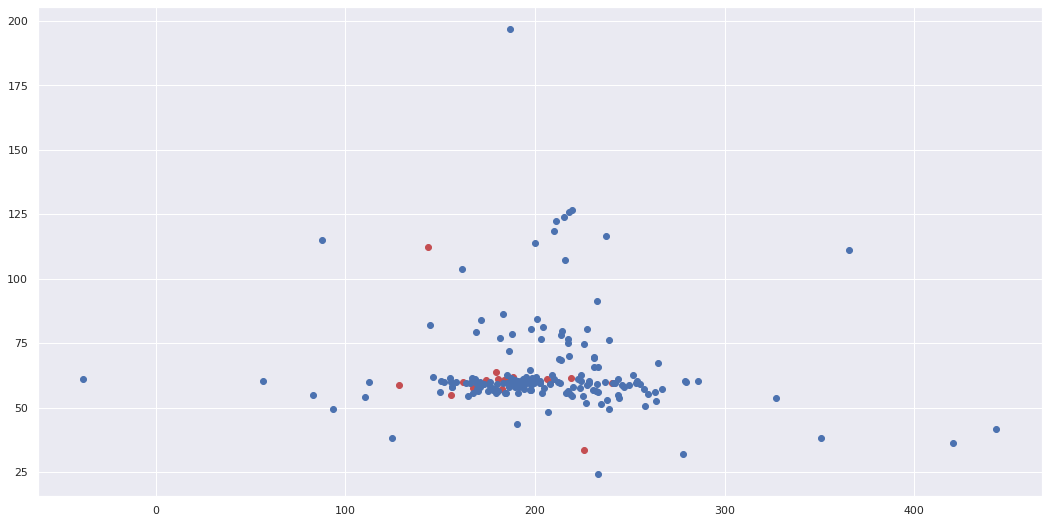

In [ ]:
flag_1 = (df_reator_parameter['V_desc']==1)&(df_reator_parameter['T_med_ench']>450)
flag_2 = (df_reator_parameter['V_desc']==0)&(df_reator_parameter['T_med_ench']>450)

plt.scatter(df_reator_parameter['1Resf'][flag_1]-df_reator_parameter['Agua_BD'][flag_1],df_reator_parameter['DT_reacao'][flag_1],c="r")
plt.scatter(df_reator_parameter['1Resf'][flag_2]-df_reator_parameter['Agua_BD'][flag_2],df_reator_parameter['DT_reacao'][flag_2])

#'1Resf'
#'2Resf'
#'P_med_resf'
#'DT_reacao'
#'T_med_drenagem'

#plt.scatter(df_reator_parameter['T_med_ench'][(df_reator_parameter['V_desc']==1)],df_reator_parameter['Agua_BD'][(df_reator_parameter['V_desc']==1)],c="r")
#plt.scatter(df_reator_parameter['T_med_ench'][(df_reator_parameter['V_desc']==0)],df_reator_parameter['Agua_BD'][(df_reator_parameter['V_desc']==0)])

In [ ]:
df_reator_parameter['V_desc'] = df_reator_parameter['V_desc'].apply(lambda x: 'Vaporizacao' if x == 1 else 'normal')

In [ ]:
#sns.pairplot(df_reator_parameter, hue='V_desc')
df_reator_parameter.reset_index(inplace = True)


In [ ]:
df_reator_parameter.drop(columns=['index'], inplace=True)

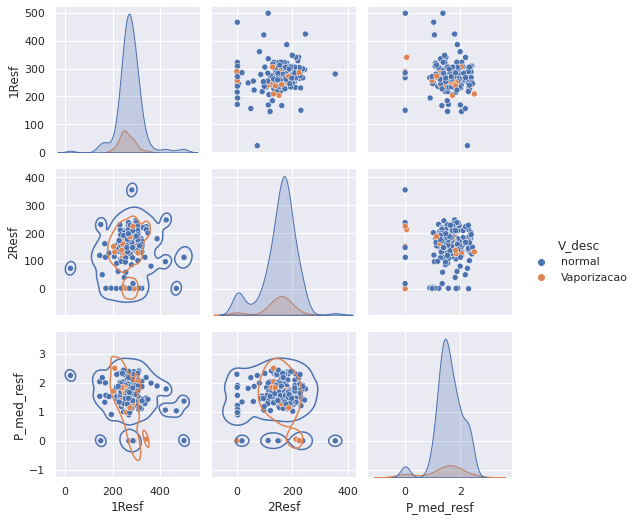

In [ ]:
#sns.pairplot(df_reator_parameter[['1Resf','2Resf','P_med_resf','V_desc']], hue='V_desc')
plt.rcParams['figure.figsize'] = (18,9)
g = sns.pairplot(df_reator_parameter[['1Resf','2Resf','P_med_resf','V_desc']], hue='V_desc')
g.map_lower(sns.kdeplot, levels=1, color=".2")


Text(0, 0.5, 'Pressão média no resfriamento')

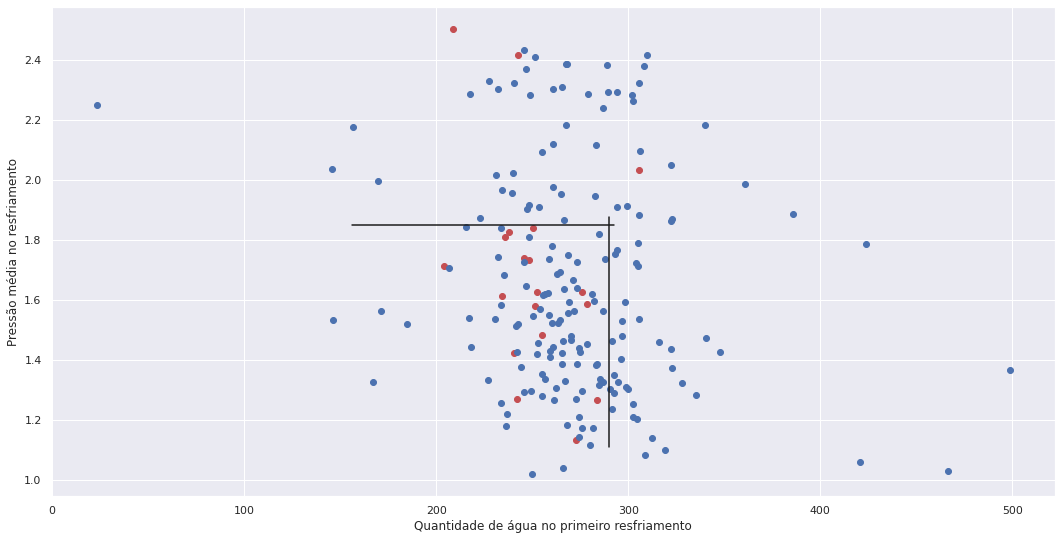

In [ ]:
flag_1 = (df_reator_parameter['V_desc']=='Vaporizacao')&(df_reator_parameter['T_med_ench']>450)&(df_reator_parameter['P_med_resf']>1)
flag_2 = (df_reator_parameter['V_desc']=='normal')&(df_reator_parameter['T_med_ench']>450)&(df_reator_parameter['P_med_resf']>1)

plt.scatter(df_reator_parameter['1Resf'][flag_1],df_reator_parameter['P_med_resf'][flag_1],c="r")
plt.scatter(df_reator_parameter['1Resf'][flag_2],df_reator_parameter['P_med_resf'][flag_2])
plt.axvline(x=290, ymin=0.1, ymax=0.57, c='k')
plt.axhline(y=1.85, xmin=0.3, xmax=0.56, c='k')
plt.xlabel('Quantidade de água no primeiro resfriamento')
plt.ylabel('Pressão média no resfriamento')


Text(0, 0.5, 'Quantidade de água no segundo resfriamento')

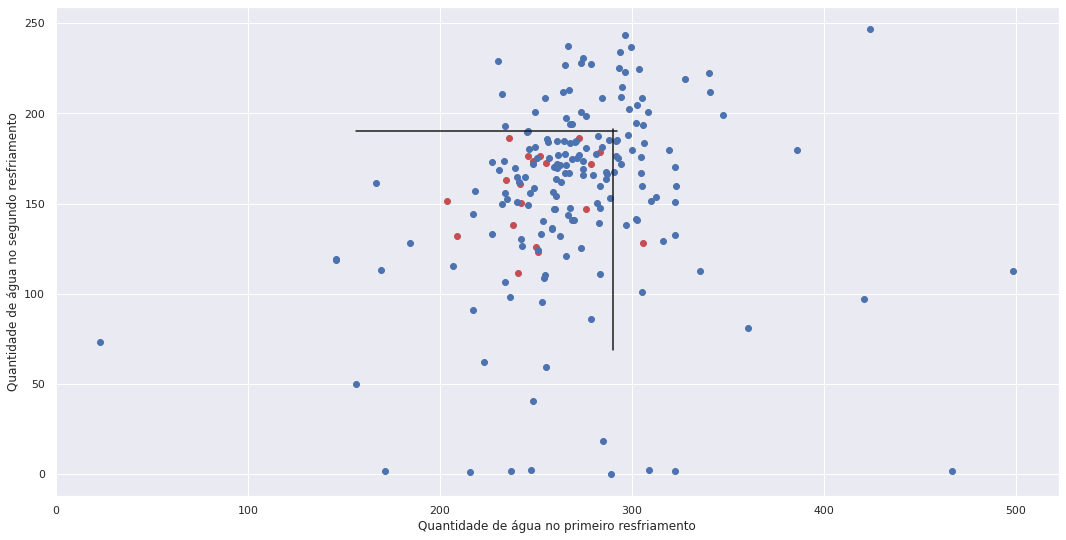

In [ ]:
plt.scatter(df_reator_parameter['1Resf'][flag_1],df_reator_parameter['2Resf'][flag_1],c="r")
plt.scatter(df_reator_parameter['1Resf'][flag_2],df_reator_parameter['2Resf'][flag_2])
plt.axvline(x=290, ymin=0.3, ymax=0.75, c='k')
plt.axhline(y=190, xmin=0.3, xmax=0.56, c='k')
plt.xlabel('Quantidade de água no primeiro resfriamento')
plt.ylabel('Quantidade de água no segundo resfriamento')

In [ ]:
occur = df_reator_parameter.groupby(['V_desc']).size()
print(occur)

V_desc
Vaporizacao     24
normal         184
dtype: int64
